#*KIBAR-AI: Kenali Isyarat, Braille Automatik Respons*

Note: *Merely schema of the project*


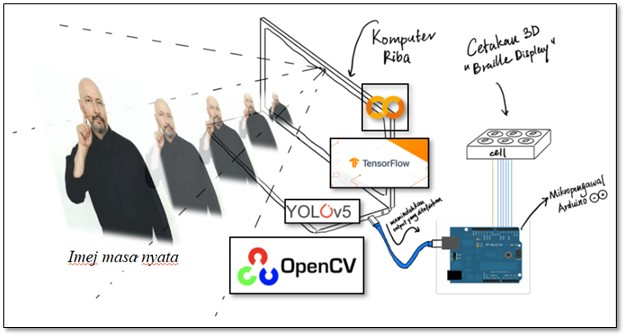

---

> Customised Object Detection Model incorporating Pre-trained YOLOv11 (You Only Look Once) which is a DL/Neural Network(CNN) - integrated, whose purpose is life is to accurately recognise and detect the hand gestures and patterns of Sign Language. Label of the detected pattern will be posted as signal that is to be interpreted at the Arduino's site, technically demonstrated by the Braille Board.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1. Import Dependencies

In [ ]:
!pip install opencv-python

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import uuid
import os

###2. Define Images to Collect

In [ ]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
          'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
number_imgs = 30

###3. Setup Folders

In [ ]:
IMAGES_PATH = os.path.join('Sign_Lang_data', 'images')

In [ ]:
if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

###4. Capture datasets using webcam

In [ ]:
def take_photo(label):
    js = Javascript('''
        async function captureImage() {
            const video = document.createElement('video');
            video.style.display = 'block';
            document.body.appendChild(video);

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight);

            await new Promise((resolve) => setTimeout(resolve, 5000)); // Wait for 5 seconds

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getTracks().forEach(track => track.stop());
            video.remove();

            return canvas.toDataURL('image/jpeg', 0.8);
        }
        captureImage();
    ''')
    display(js)
    data = eval_js('captureImage()')
    binary = b64decode(data.split(',')[1])
    imgname = os.path.join(IMAGES_PATH, label + '_' + str(uuid.uuid1()) + '.jpg')
    with open(imgname, 'wb') as f:
        f.write(binary)
    print(f'Image captured and saved as {imgname}')

# Manually insert selected label
# The runtime tends to be exceeded if all images were captured all at once in a row
label = 'J' # Replace with the uncaptured sign
print(f'Collecting images for {label}')
for i in range(number_imgs):
      print(f'Collecting image {i+1}/{number_imgs} for {label}')
      take_photo(label)

<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_4018c8c8-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_43e9fbc0-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_4817d190-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_4bf09fb8-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_4fb6c96a-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_53a35714-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_57f361ba-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_5c2cb024-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_601d4090-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_6443aa38-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_68021574-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_6bf28d76-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_6fd3e9a8-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_73c0dae4-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_77a66066-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_7b6c61fa-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_7f8f99b4-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_840517f8-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_87f1aeee-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_8bcceb64-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_8f883ee8-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_934d8146-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_97303ee8-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_9afee2d6-c4d3-11ef-8562-0242ac1c000c.jpg


<IPython.core.display.Javascript object>

Image captured and saved as Yes/Yes_9eec0d6a-c4d3-11ef-8562-0242ac1c000c.jpg


In [ ]:
import shutil

In [ ]:
# Save the images captured before runtime ends
img_alpha = "/content/Sign_Lang_data/images/J"  # Source directory
drive_path = "/content/drive/MyDrive/KIBAR-AI/Sign_Lang_data/images"  # Destination directory on your Drive

shutil.copytree(img_alpha, drive_path + "/J")

'/content/drive/MyDrive/KIBAR-AI/Sign_Lang_data/images/J'

In [ ]:
# Delete unwanted yet unempty files
path_deleted = "/content/J"
shutil.rmtree(path_deleted)

###5. Image Labelling using labellmg & Conversion from .xml to .txt
Expected format of annotation files (txt.) for YOLO:


```
<class_id> <x_center> <y_center> <width> <height>
```
Example:


```
0 0.814844 0.480208 0.289062 0.427083
```
For ``` data.yaml ```:
```
# Sample code:
train: ../train/images
val: ../test/images

nc: 6
names: ['Hello', 'IloveYou', 'No', 'Please', 'Thanks', 'Yes']
```

1. *Formula of Normalising Center Coordinates*:

$$
{\text center{\_x}} = \frac{x_{\text{min}} + x_{\text{max}}}{2 \cdot image{\_width}}
$$

$$
{\text center{\_y}} = \frac{y_{\text{min}} + y_{\text{max}}}{2 \cdot image{\_height}}
$$

2. *Formula of Normalising Width and Height*:
$$width = \frac{x_{max} - x_{min}}{image{\_width}}$$

$$height = \frac{y_{max} - y_{min}}{image{\_height}}$$



In [ ]:
!unzip Sign_Lang_data.zip

Archive:  Sign_Lang_data.zip
   creating: Sign_Lang_data/
   creating: Sign_Lang_data/images/
   creating: Sign_Lang_data/images/A/
  inflating: Sign_Lang_data/images/A/A_027ab534-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_063cdfa8-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_09ffa8c8-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_0dc3dde4-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_11b7c4e2-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_15abe02e-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_197a5a14-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_a991298a-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_ad6677d6-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_b12cd1da-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: Sign_Lang_data/images/A/A_b5110ec4-

In [ ]:
# Demo code: Code snippets for implementing labelImg.py can only be run in local terminal; Colab does not support the particular GUI extension
!pip install --upgrade pyqt5 lxml

In [ ]:
LABELIMG_PATH = os.path.join('/content/Sign_Lang_data', 'labels')
if not os.path.exists(LABELIMG_PATH):
    os.makedirs(LABELIMG_PATH)
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [ ]:
# Running on Windows machine
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!apt-get update
!apt-get install -y libxkbcommon-x11-0 libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-randr0 libxcb-render-util0 libxcb-xinerama0 libxcb-xfixes0 libxcb-shape0 libxcb-util0

In [ ]:
%env QT_QPA_PLATFORM=offscreen

env: QT_QPA_PLATFORM=offscreen


In [ ]:
!cd {LABELIMG_PATH} && python labelImg.py

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
import zipfile

def create_directory_for_zip(zip_file_path):

    # Extract the directory name from the zip file path.
    directory_name = os.path.splitext(os.path.basename(zip_file_path))[0]

    # Create the directory if it doesn't exist.
    directory_path = os.path.join(os.path.dirname(zip_file_path), directory_name)
    os.makedirs(directory_path, exist_ok=True)

    return directory_path

zip_file_path = '/content/Sign_Lang_data.zip'  # Replace with your zip file path
sign_lang_data = create_directory_for_zip(zip_file_path)

In [ ]:
# Additional:
!mkdir converted_label

In [ ]:
# Hash map for class_id
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O',
               'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
class_mapping = {name: i for i, name in enumerate(sorted(list(class_names)))}
print(class_mapping)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [ ]:
# Define paths
ANNOTATIONS_PATH = "/content/Sign_Lang_data/Sign_Lang_data/labels"  # Folder with XML files
OUTPUT_PATH = "/content/converted_label"                            # Folder to save TXT files

# Ensure the output path exists
os.makedirs(OUTPUT_PATH, exist_ok=True)

# Alternative function:
def convert_to_yolo_format(size, box):
    """
    Convert VOC bounding box format to YOLO format.
    size: tuple (width, height) of the image.
    box: tuple (xmin, ymin, xmax, ymax) of the bounding box.
    Returns YOLO format (x_center, y_center, width, height).
    """
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x_center = round((box[0] + box[2]) / 2.0 - 1, 6)  # Cap to 6 decimal places
    y_center = round((box[1] + box[3]) / 2.0 - 1, 6)  # Cap to 6 decimal places
    width = round(box[2] - box[0], 6)  # Cap to 6 decimal places
    height = round(box[3] - box[1], 6)  # Cap to 6 decimal places
    return (x_center * dw, y_center * dh, width * dw, height * dh)

def normalize_coordinates(x_min, y_min, x_max, y_max, image_width, image_height):

    """
    Convert VOC bounding box format to YOLO format.
    size: tuple (width, height) of the image.
    box: tuple (xmin, ymin, xmax, ymax) of the bounding box.
    Returns YOLO format (x_center, y_center, width, height).
    """
    # Calculate normalized center, width, and height
    center_x = (x_min + x_max) / (2 * image_width)
    center_y = (y_min + y_max) / (2 * image_height)
    width = (x_max - x_min) / image_width
    height = (y_max - y_min) / image_height

    # Cap the decimals at 6
    center_x = round(center_x, 6)
    center_y = round(center_y, 6)
    width = round(width, 6)
    height = round(height, 6)

    return center_x, center_y, width, height


for xml_file in os.listdir(ANNOTATIONS_PATH):
    if not xml_file.endswith('.xml'):
        continue

    tree = ET.parse(os.path.join(ANNOTATIONS_PATH, xml_file))
    root = tree.getroot()

    # Extract image dimensions
    size = root.find('size')
    img_width = int(size.find('width').text)
    img_height = int(size.find('height').text)

    # Prepare TXT file
    base_name = os.path.splitext(xml_file)[0]
    txt_file = os.path.join(OUTPUT_PATH, f"{base_name}.txt")

    with open(txt_file, 'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            class_id = class_mapping.get(class_name)

            if class_id is None:
                raise ValueError(f"Unknown class name: {class_name}")

            bndbox = obj.find('bndbox')
            xmin = float(bndbox.find('xmin').text)
            ymin = float(bndbox.find('ymin').text)
            xmax = float(bndbox.find('xmax').text)
            ymax = float(bndbox.find('ymax').text)

            # Normalize bounding box
            yolo_box = normalize_coordinates(xmin, ymin, xmax, ymax, img_width, img_height)

            # Write to file
            f.write(f"{class_id} {yolo_box[0]:.6f} {yolo_box[1]:.6f} {yolo_box[2]:.6f} {yolo_box[3]:.6f}\n")

In [ ]:
# Define function to compress and download the processed files/folders
# At this point, this function whose purpose in life is to save the annotations files to local hard disk
import zipfile
from google.colab import files

def zip_and_download(input_folder_path, output_zip_path):
    """
    Zips the contents of a folder and downloads the resulting ZIP file.

    Parameters:
    - input_folder_path: Path to the folder to be zipped.
    - output_zip_path: Path to save the ZIP file.
    """
    with zipfile.ZipFile(output_zip_path, 'w') as zipf:
        for root, dirs, files_in_dir in os.walk(input_folder_path):
            for file in files_in_dir:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, input_folder_path)  # Relative path for correct folder structure in ZIP
                zipf.write(file_path, arcname)
    files.download(output_zip_path)

# Correctly zip the contents of the folder
#zip_and_download('/content/converted_label', 'converted_label.zip')

###6. Split the datasets (JPGs & Annotations) into Test & Train Partition

General ratio for test and train sets:

80-90%: train set

10-20%: test set



In [ ]:
# Import scikit-learn library for partition of train and test
from sklearn.model_selection import train_test_split

data_dir = "/content/Sign_Lang_data/images"  # Folder with subfolders for each category
output_dir = "/content/sign_datasets"  # Folder to save split data
label_path = "/content/Sign_Lang_data/labels" # Add the corresponding labels in accordance with their respective filenames

# Create directories
os.makedirs(output_dir, exist_ok=True)
os.makedirs(f"{output_dir}/train", exist_ok=True)
os.makedirs(f"{output_dir}/test", exist_ok=True)

for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        # Get all images in the category
        images = os.listdir(category_path)

        # Split into train and test
        train, test = train_test_split(images, test_size=0.20, random_state=42)  # 80% train, 20% test

        # Create category subfolders
        os.makedirs(f"{output_dir}/train/{category}", exist_ok=True)
        os.makedirs(f"{output_dir}/test/{category}", exist_ok=True)

        # Copy files to respective folders
        for img in train:
            shutil.copy(os.path.join(category_path, img), f"{output_dir}/train/{category}")
        for img in test:
            shutil.copy(os.path.join(category_path, img), f"{output_dir}/test/{category}")

        # Copying the correspoding labels from label_path into the train & test sets
        for label_file in os.listdir(label_path):
            label_base = os.path.splitext(label_file)[0]  # Get the base name without extension
            if label_base in [os.path.splitext(img)[0] for img in train]:  # Match label with train set
                shutil.copy(os.path.join(label_path, label_file), f"{output_dir}/train/{category}")
            elif label_base in [os.path.splitext(img)[0] for img in test]:  # Match label with test set
                shutil.copy(os.path.join(label_path, label_file), f"{output_dir}/test/{category}")


In [ ]:
# Define the paths for datasets
base_dir = "/content/sign_datasets"
sets = ["train", "test"]

In [ ]:
# Extract the images and annotations files from their subfolders

# Iterate through both train and test sets
for dataset in sets:
    dataset_dir = os.path.join(base_dir, dataset)

    # Iterate through each subfolder in the dataset directory
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)

        # Check if the folder is a directory (skip files in the root directory)
        if os.path.isdir(folder_path):
            # Iterate through all files in the folder
            for file in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file)

                # Move the file to the root dataset directory
                if os.path.isfile(file_path):
                    shutil.move(file_path, dataset_dir)

            # Delete the empty subfolder
            os.rmdir(folder_path)

In [ ]:
for dataset in sets:
    dataset_dir = os.path.join(base_dir, dataset)

    # Define new directories for images and labels
    images_dir = os.path.join(dataset_dir, "images")
    labels_dir = os.path.join(dataset_dir, "labels")

    # Create directories if they don't exist
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    # Iterate through all files in the dataset folder
    for file in os.listdir(dataset_dir):
        file_path = os.path.join(dataset_dir, file)

        # Move images to the images directory
        if file.endswith(".jpg"):
            shutil.move(file_path, images_dir)

        # Move labels to the labels directory
        elif file.endswith(".txt"):
            shutil.move(file_path, labels_dir)

In [ ]:
# External Pre-captured datasets for "words"
external_dir = "/content/external_sign_datasets" # Note that the class_id of base_name.img in external_dir must be the preceeding indices after 25
local_dir = base_dir

for dataset in sets:
    # Define paths for images
    external_img_dir = os.path.join(external_dir, dataset, "images")
    local_img_dir = os.path.join(local_dir, dataset, "images")

    # Iterate through every single image in external_dir
    for img in os.listdir(external_img_dir):
        shutil.copy(os.path.join(external_img_dir, img), local_img_dir)

    # Followed by defining the paths for labels
    external_label_dir = os.path.join(external_dir, dataset, "labels")
    local_label_dir = os.path.join(local_dir, dataset, "labels")
    if os.path.exists(external_label_dir):
        for label in os.listdir(external_label_dir):
            shutil.copy(os.path.join(external_label_dir, label), local_label_dir)

In [ ]:
# Import the previously defined funct "zip_and_download"
zip_and_download('/content/sign_datasets', 'sign_datasets.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###7. Compress and upload to Google Colab

In [ ]:
!unzip sign_datasets.zip

Archive:  sign_datasets.zip
   creating: sign_datasets/
   creating: sign_datasets/test/
   creating: sign_datasets/test/images/
  inflating: sign_datasets/test/images/A_09ffa8c8-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/A_0dc3dde4-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/A_b9055d8c-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/A_d0434fe0-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/A_d81953d6-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/A_dfb4ba4a-c2a8-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/B_48443158-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/B_4ff332dc-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/B_5f57da7a-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test/images/B_6321e1aa-c2a9-11ef-87f0-0242ac1c000c.jpg  
  inflating: sign_datasets/test

In [ ]:
create_directory_for_zip('/content/sign_datasets.zip')

'/content/sign_datasets'

In [ ]:
import yaml

# Define the data for the YAML file
data = {
    'train': '/content/train/images',
    'val': '/content/test/images',

    'nc': 32,
    'names': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'Hello', 'IloveYou', 'No', 'Please', 'Thanks', 'Yes']
}

# Create the directory if it doesn't exist
os.makedirs('/content/sign_datasets/', exist_ok=True)

# Define the file path
file_path = '/content/sign_datasets/data.yaml'

# Write the data to the YAML file
with open(file_path, 'w') as file:
    yaml.dump(data, file)

# Successfully created
print(f"YAML file created at: {file_path}")

YAML file created at: /content/sign_datasets/data.yaml


In [ ]:
# Define source and destination paths
source_dir = "/content/sign_datasets"
destination_dir = "/content/drive/MyDrive/sign_datasets"

In [ ]:
# Copy the directory to Google Drive
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True) # dirs_exist_ok handles existing directories
print(f"Directory '{source_dir}' copied to '{destination_dir}'")

Directory '/content/sign_datasets' copied to '/content/drive/MyDrive/sign_datasets'


In [ ]:
# Or ideally, in zip file
destination_file = destination_dir + ".zip"  # Zip file path

# Create a zip file of the directory
with zipfile.ZipFile(destination_file, 'w') as zipf:
    for folderName, subfolders, filenames in os.walk(source_dir):
        for filename in filenames:
            #create complete filepath of file in directory
            filePath = os.path.join(folderName, filename)
            # Add file to zip, preserving folder structure
            zipf.write(filePath, arcname=os.path.relpath(filePath, source_dir))

print(f"Directory '{source_dir}' zipped to '{destination_file}'")

Directory '/content/sign_datasets' zipped to '/content/drive/MyDrive/sign_datasets.zip'


###8. Prepare the YOLO model


```
Proceed with Part II
```

